# Raspberry Pi_7th

# Windows pc와 라즈베리 파이 간의 이종 클러스터링

## 1. Windows os에서 linux 환경 구축 - WSL (Windows Subsystem for Linux)
지난 시간 우리는 'Linux용 WIndows하위 시스템'(베타 버전) 이라는 윈도우 10 내장 기능을 이용하여 이미 구성된 리눅스 기반의 파이 클러스터와 고정 ip를 사용하는 윈도우 기반의 pc를 이종 클러스터로 만드는 과정을 진행하였다. 그 과정에서 이종 클러스터의 마스터노드를 기존에 사용하던 파이의 마스터노드(pi001)로 그대로 사용하여 문제가 발생했으므로 이번엔 pc를 마스터노드로 사용하여 클러스터링을 진행해 보았다. <br>
<br>
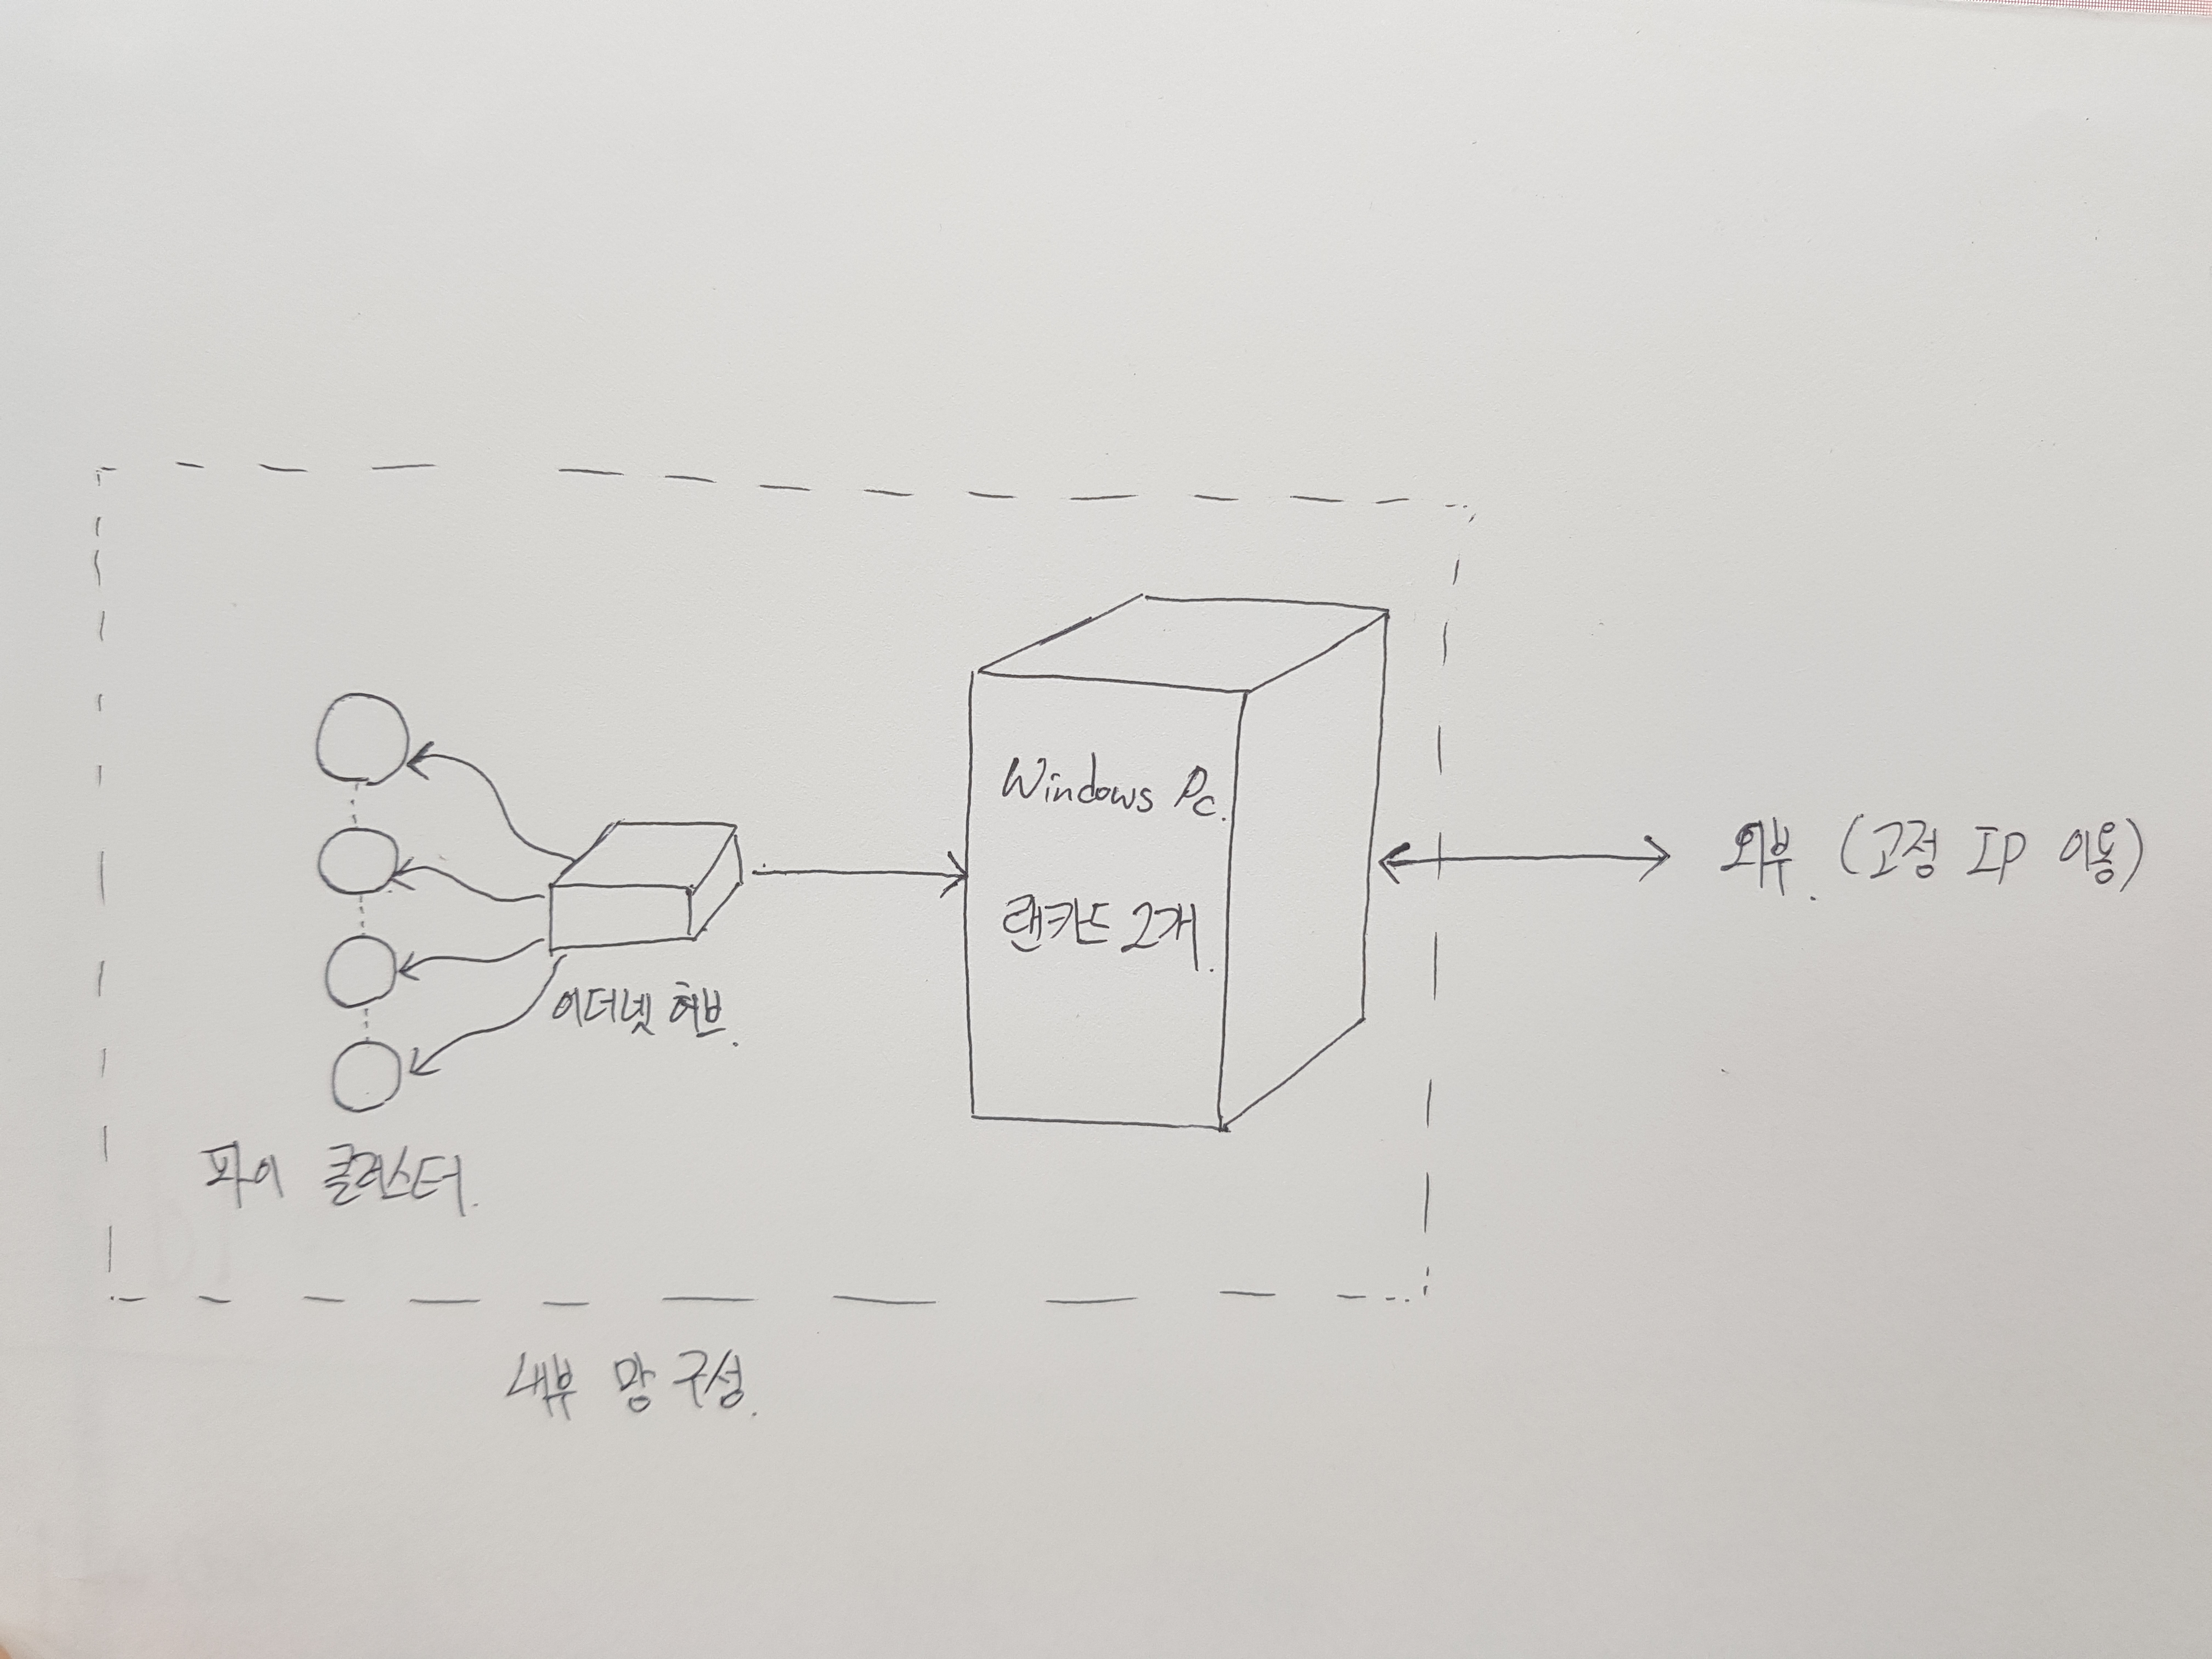

--------------------------
모든 과정은 windows powershell에서 진행한다. 지난 시간 ubuntu 구동까지는 성공했으므로 설명은 생략하고, 바로 bash shell을 띄운다. <br>
__실제 운영체제는 아니지만 파이와 마찬가지로 리눅스 기반이기 때문에 키 교환 시 인증 키가 있는 디렉토리만 잘 기입해 주면 교환이 가능할 것이라고 판단.__ 그대로 pc에 keygen을 생성한다.<br>
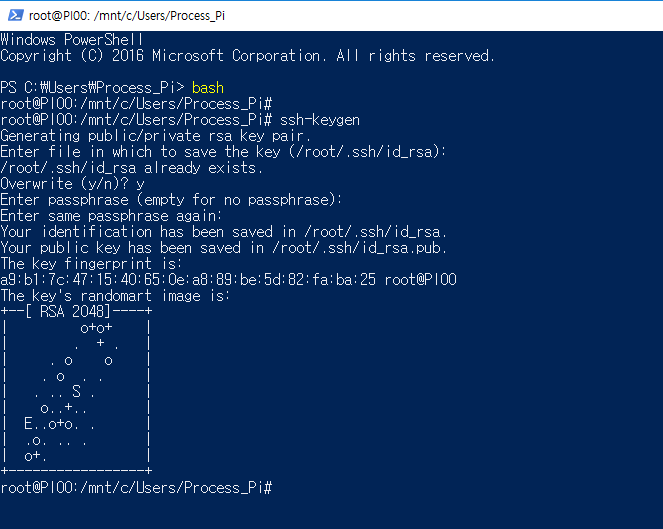

------------------------------------
디렉토리 /root/.ssh로 이동해 생성된 인증key를 pi00이라는 이름으로 저장한다.<br>
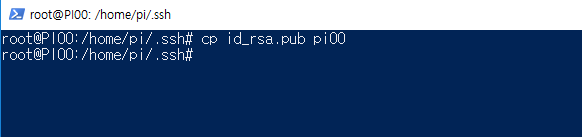


------
저장한 pi00을 pi001의 /.ssh 디렉토리로 복사해야 한다.(서버 간 복사 scp) 먼저 ssh로 pc에서 파이로 넘어간 뒤, 마찬가지로 keygen으로 인증key를 생성한다.<br>
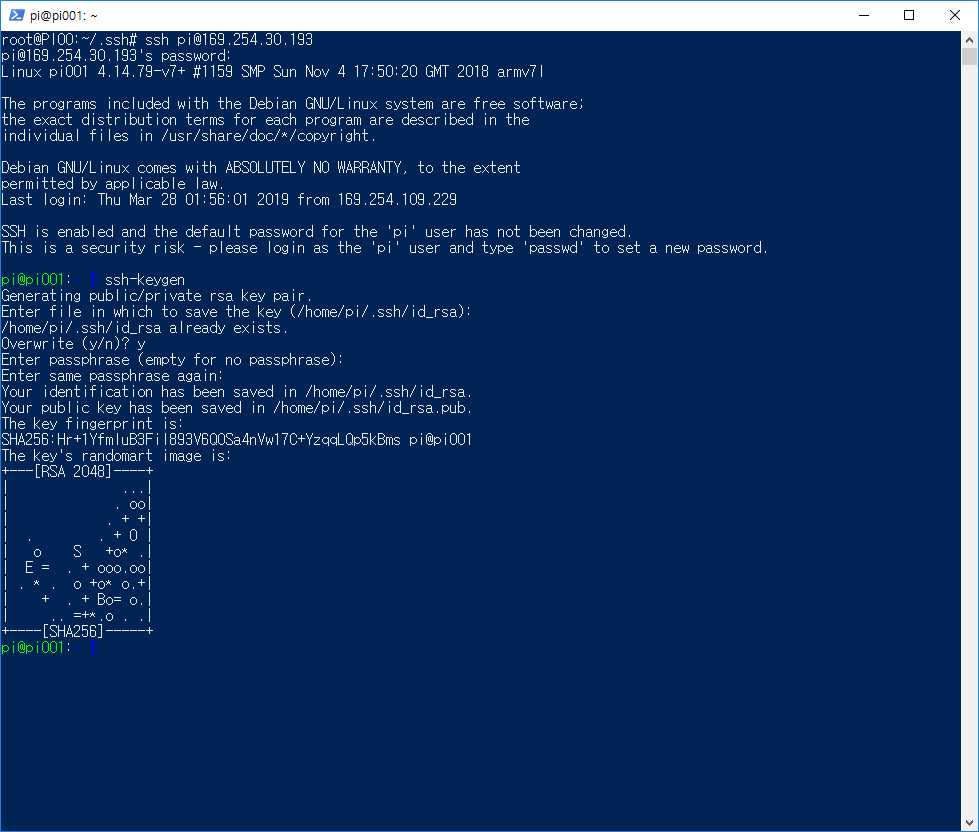



------
/.ssh로 이동하여 pc의 인증 key pi00을 복사하면 요청이 실패했다는 문구와 함께 오류가 발생한다. <br>
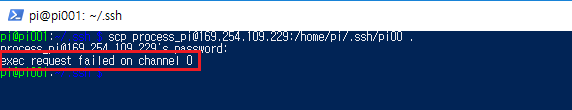

--------
그러나 역으로 파이의 key를 pc로 복사해 보면, 잘 복사가 되는 것을 확인할 수 있다.<br>
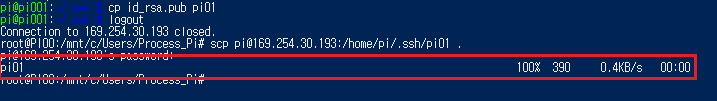

---------
이에대한 이유는 현재 지식으론 명확하진 않으나 다음과 같을 것으로 예상된다. <br>
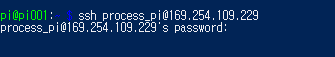  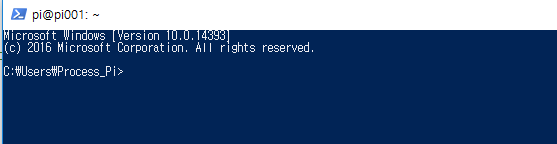 
<br>
이는 하부 노드인 pi001,즉 리눅스 운영체제에서 윈도우인 pc로 접속을 시도했을 때의 사진이다. 접속은 가능하나, 가상운영체제인 리눅스(우분투)의 bash shell이 아닌 윈도우의 power shell이 나오는 것을 확인할 수 있다. 우리가 bash라고 입력하여 wsl을 만들어 준 것이 key 교환 과정에서는 구현이 되지 못했기 때문에 위에서 오류가 난 것으로 해석된다.<br>
<br>
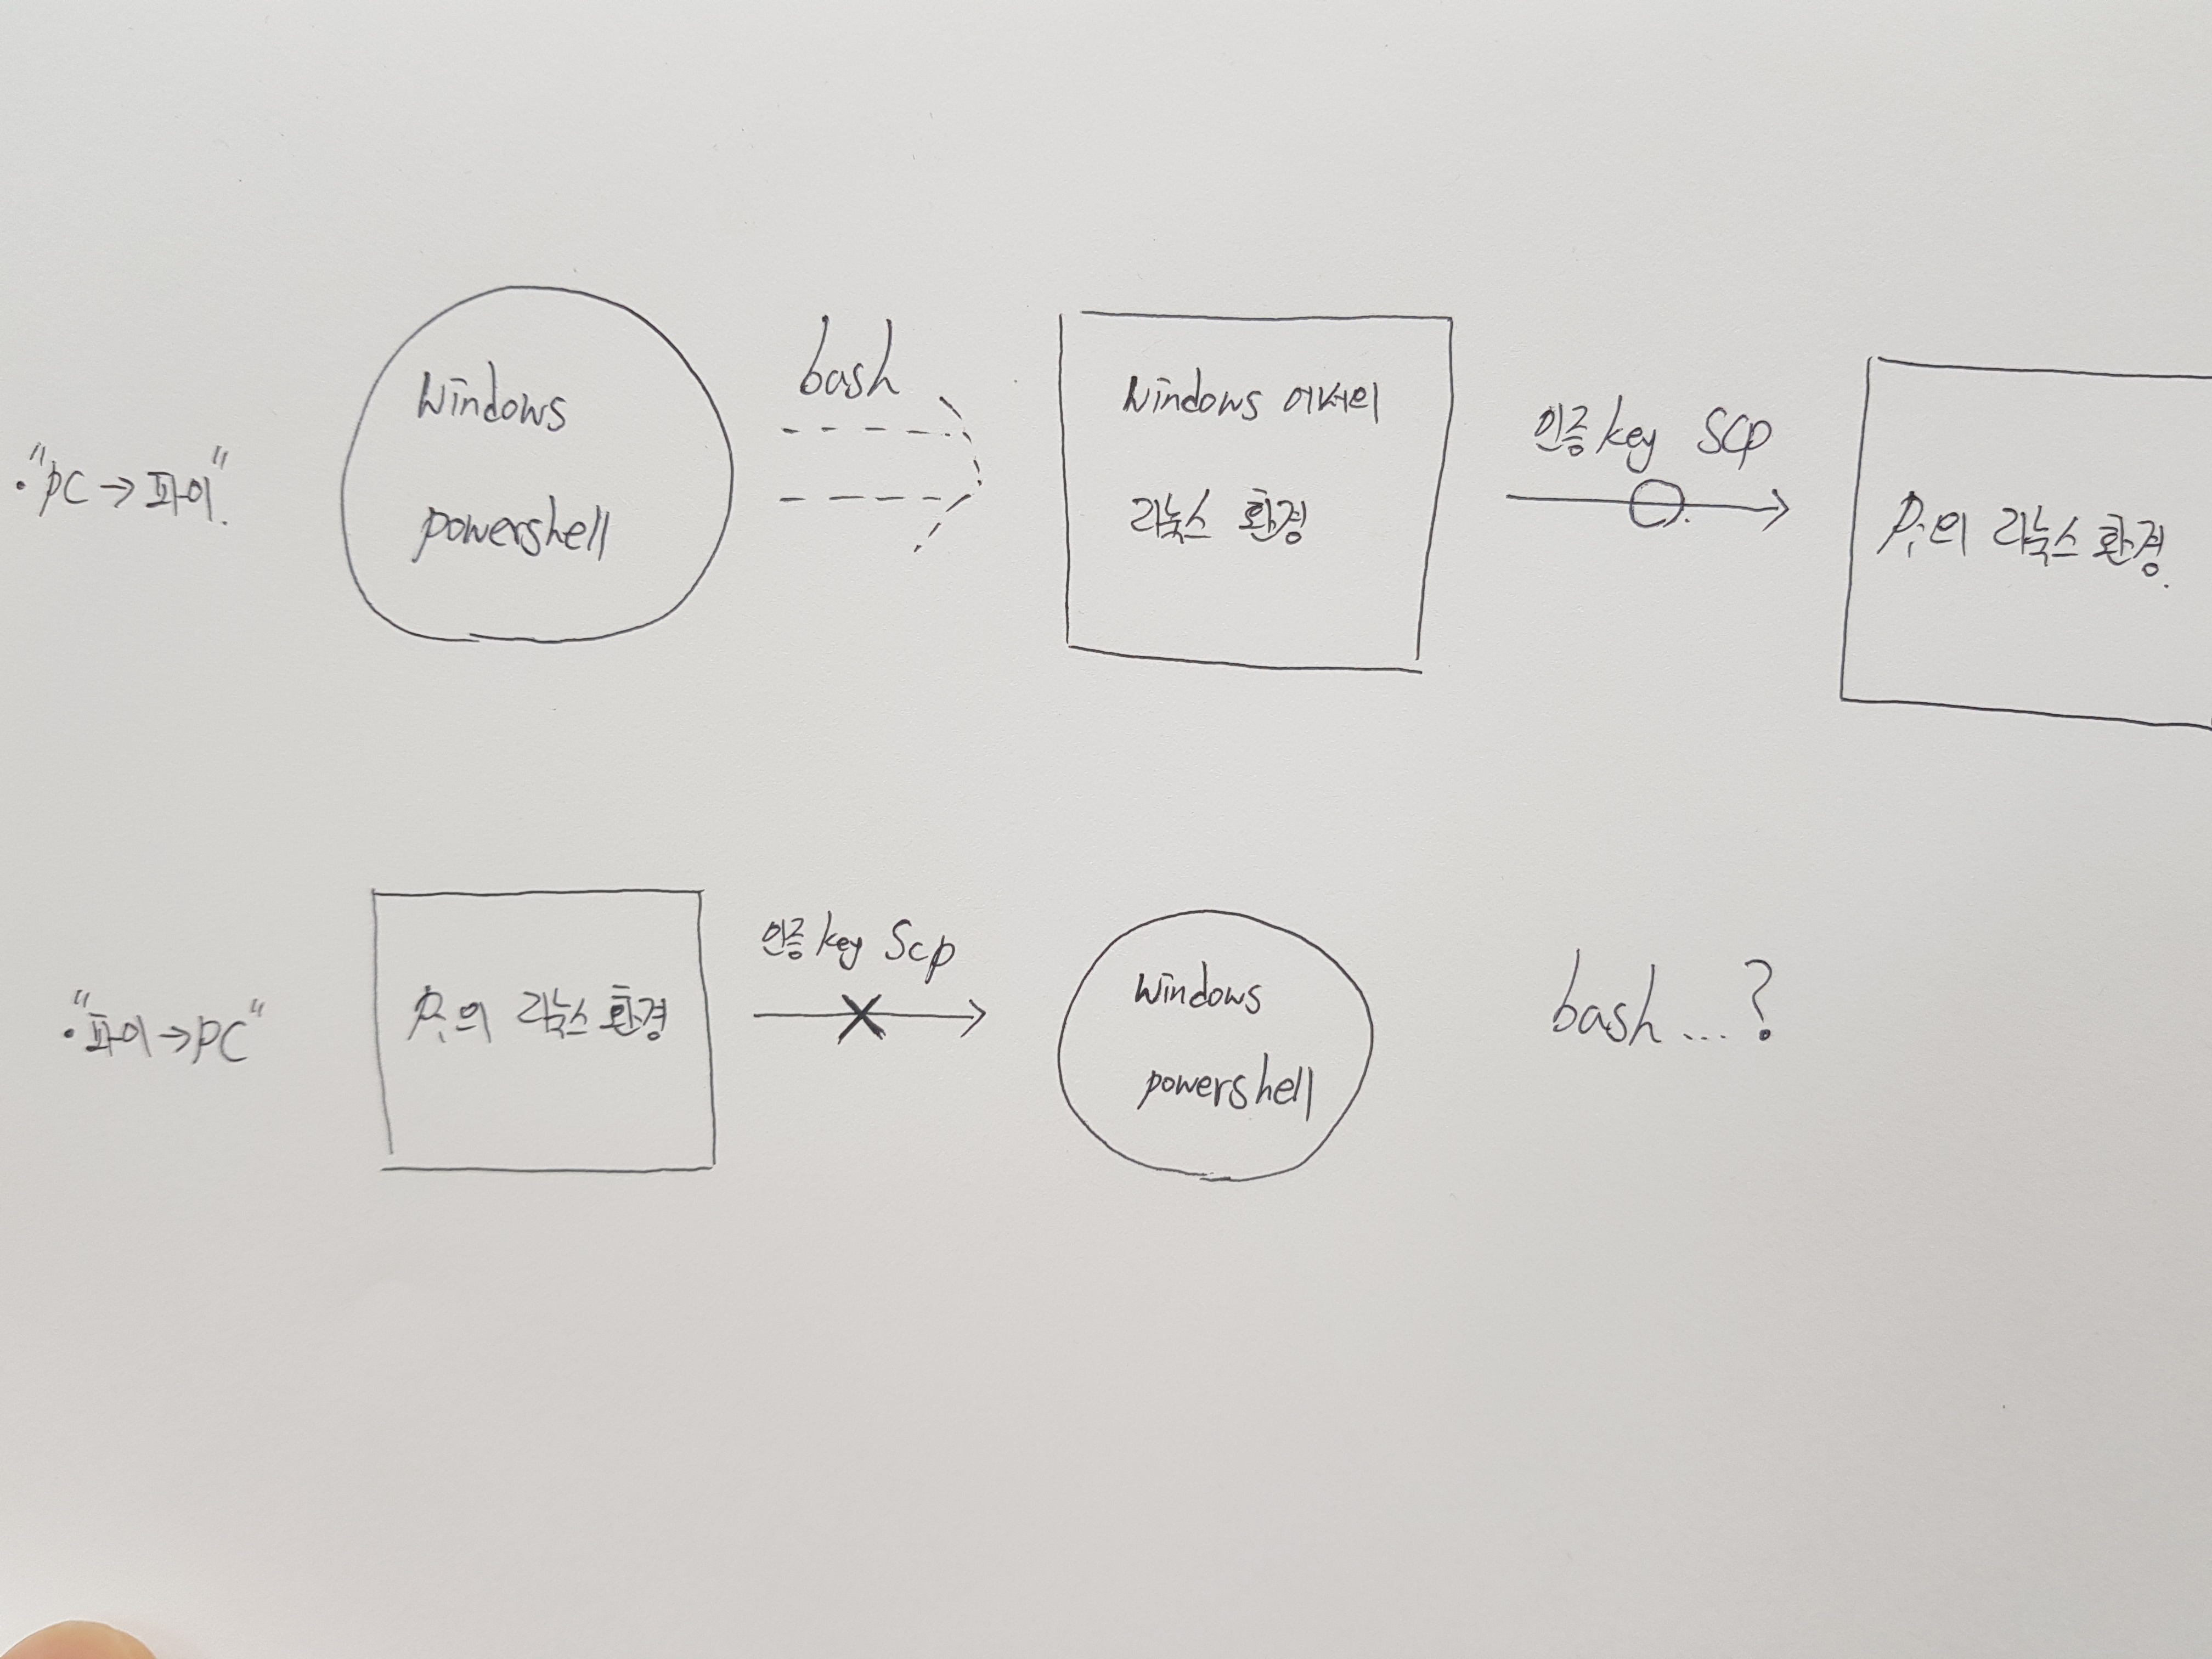

## 2. VirtualBox에서의 linux 환경 구축 - ubuntu 64bit

---------------
그렇다면 한번 켜 놓으면 bash의 과정이 필요 없는 __'가상머신'__ 을 이용한 리눅스 운영체제를 구현하면 어떨까? 하부 노드로 ssh를 연결하더라도, 클러스터링시 구동되는 자체 운영체제가 리눅스라면 위와 같은 문제는 없지 않을까?
___________________________
이와같은 의문에서 두 번째 시도를 해 보았다. 가상머신으로 Virtual Box를 선정했고, 운영체제는 ubuntu 64비트 이다. 여기서 Hyper Visor와 VT라는 가상화 기술의 개념이 필요한데, 둘 다 맥락은 비슷하다. 서버 가상화를 위해 나온 가상머신 활성화 툴이며 둘은 동시에 사용이 불가능하다. Hyper V는 마이크로소프트에서(os), VT는 인텔에서(cpu) 제공하는 기술이다. 사용할 프로그램의 타입에 따라 둘 중 하나의 기능을 꺼야 하며, 변경 시 pc를 재부팅해야 한다.<br>
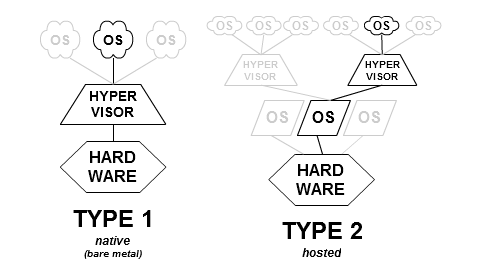<br>
왼쪽이 hyper v를 사용하며, 예시로 도커를 들 수 있고 오른쪽이 VT를 사용하는 예시이다. 예시로 VMware, VirtualBox등이 있다.
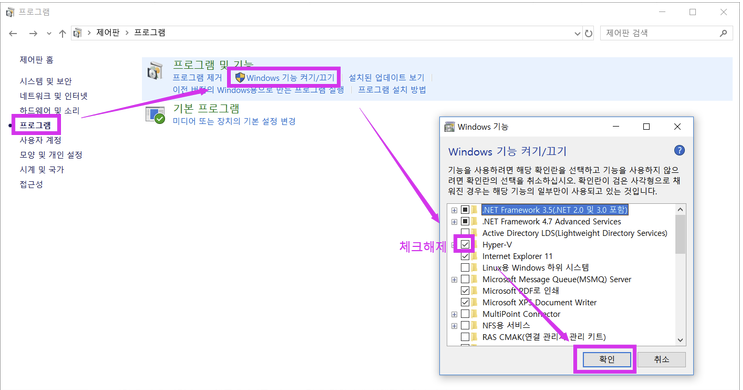<br>
따라서 우리는 이와 같은 과정을 거져 hyper v 기능을 꺼야 한다. (이후 재부팅)

----------------------------------
위의 과정을 완료했다면, virtualbox를 실행하여 가상운영체제를 만들어 보자. 필요한 것은 virtualbox 프로그램과 운영체제인 ubuntu 64bit의 이미지 파일이다. 이미지 파일은 우분투 홈페이지에서 쉽게 구할 수 있다. 용량은 2기가정도. 다운로드 받으면서 진행할 수도 있다.<br>
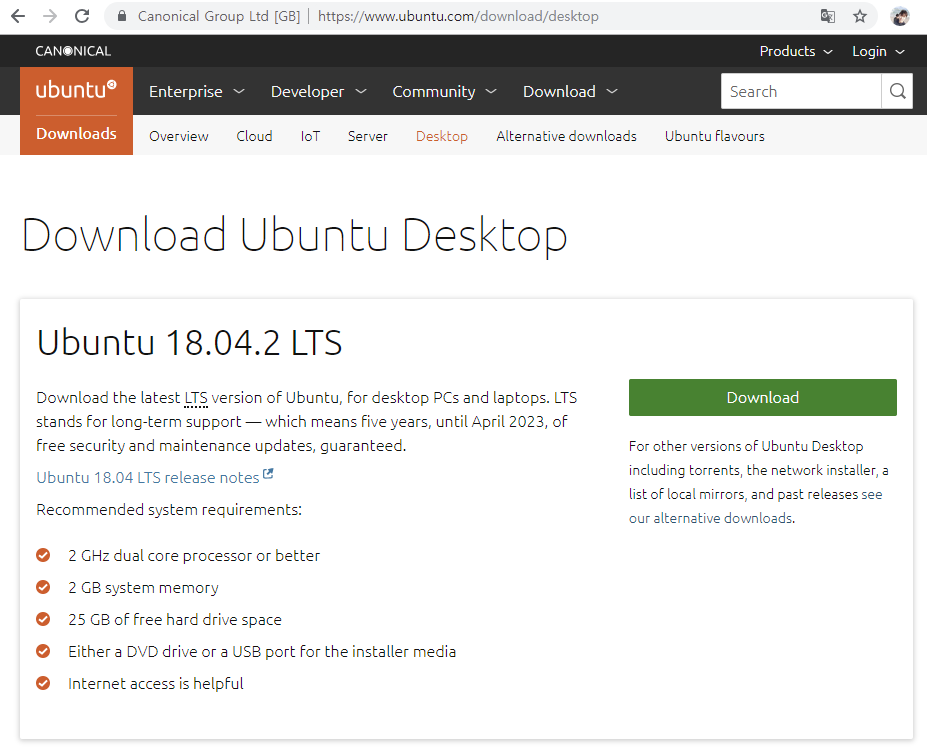<br>
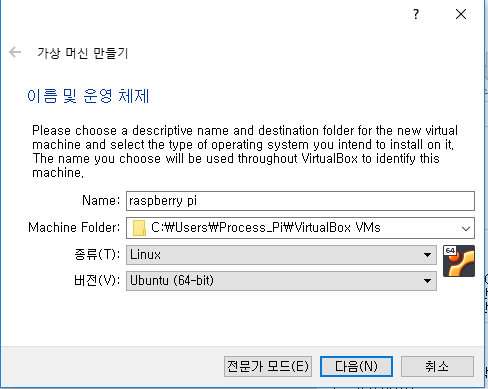<br>
위의 과정에서 다음을 누르면 도커 설정처럼 할당 메모리, 디스크 용량 등을 설정할 수 있지만 여건상 디폴트값으로 정해진 용량만큼만 설정해 준다. 여기에 아까 받았던 우분투 이미지 파일을 시동 디스크로 열어주기만 하면 된다. 좌측의 pi 탭을 더블클릭하면 운영체제를 구현하는 몇 분 간의 과정 이후, 우측처럼 리눅스 가상 운영체제를 구현할 수 있다.<br>
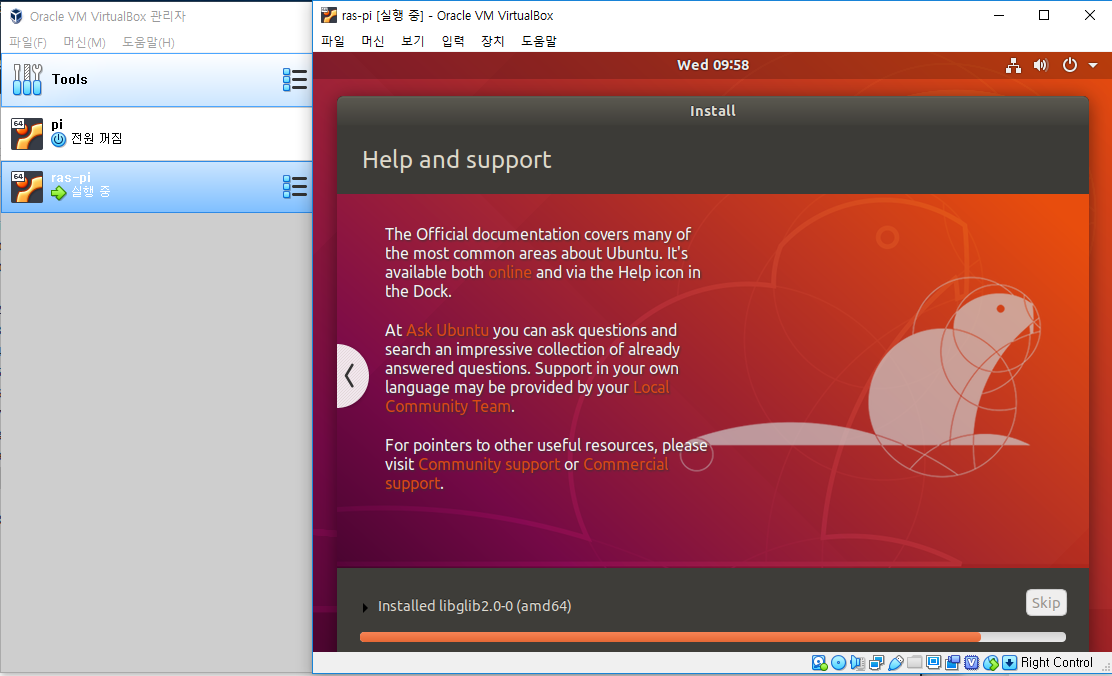<br>
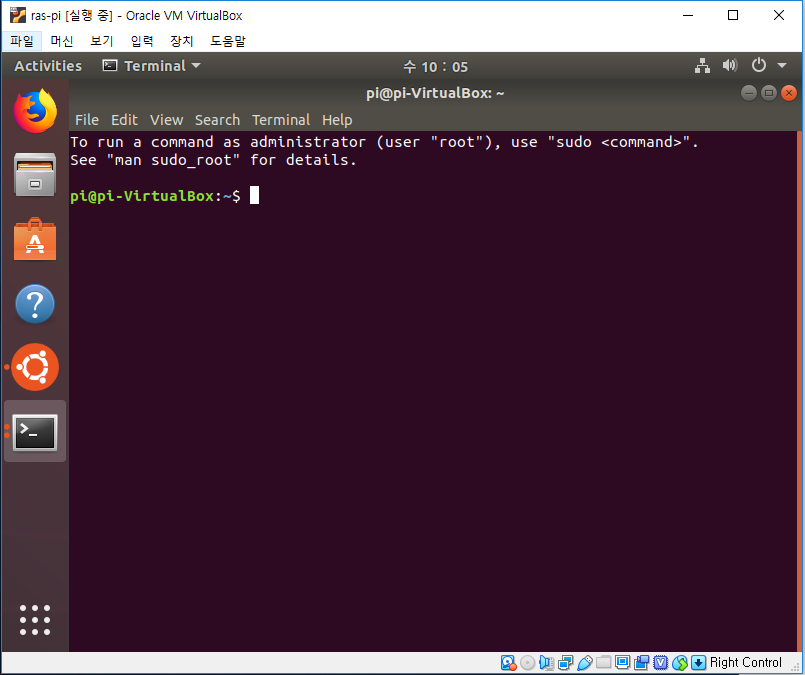<br>




-----------------------------
이제 이 리눅스 가상머신을 마스터노드로 클러스터링을 시도해 보았는데, WSL과는 다른 문제가 발생했다.<br>
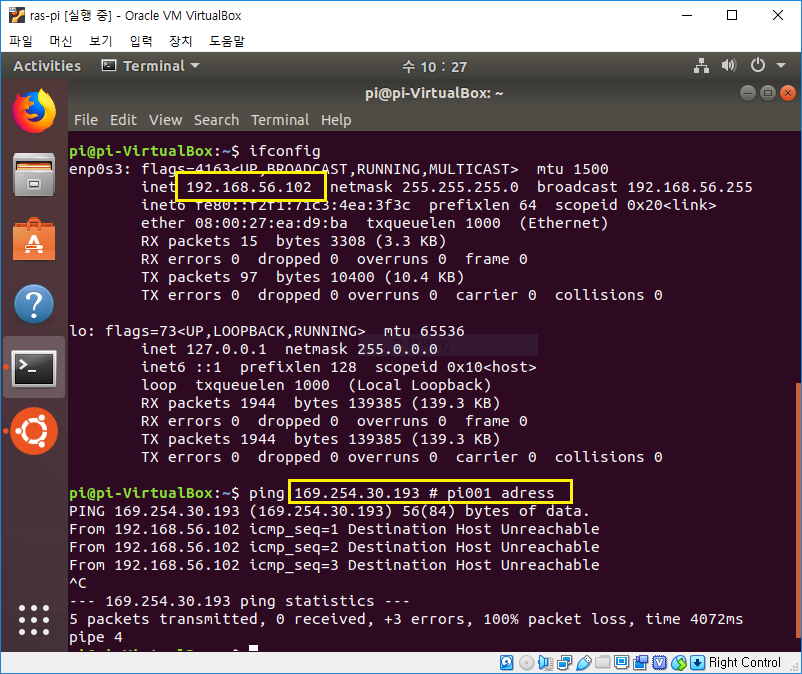<br>
위의 네모가 현재 이 가상머신이 가진 ip주소이고, 아래의 네모가 pi001 노드의 내부 망 ip주소이다. a,b클래스가 모두 다르다. VM이나 VB, 도커같은 가상머신을 실행하면 가상화된 공간만의 ip주소가 따로 생기게 된다. 이를 host only natwork라 하는데, 쉽게 생각해서 내부 망과 외부 망의 중간쯤에 애매하게 걸친 상태라고 보면 된다. 외부로 인터넷이 되는 것도 아니고, 하부 클러스터쪽으로도 핑이 뻗지 않는 상태. 오로지 메인 pc와의 통신만 가능하다. <br>
WSL은 가상머신을 이용하지 않기 때문에 ip와 게이트웨이가 따로 생성되지 않아 이런 문제가 발생하지 않았었다.


----------------------------
좀 더 알아본 결과 VB의 설정 - 네트워크 항목에서 가상머신이 어떤 랜카드의 정보를 받아올지 설정할 수 있었다.<br> 아래가 내부 망의 랜카드, 위가 고정아이피를 가진 랜카드이다. 아래를 선택하고 재부팅한다.<br>
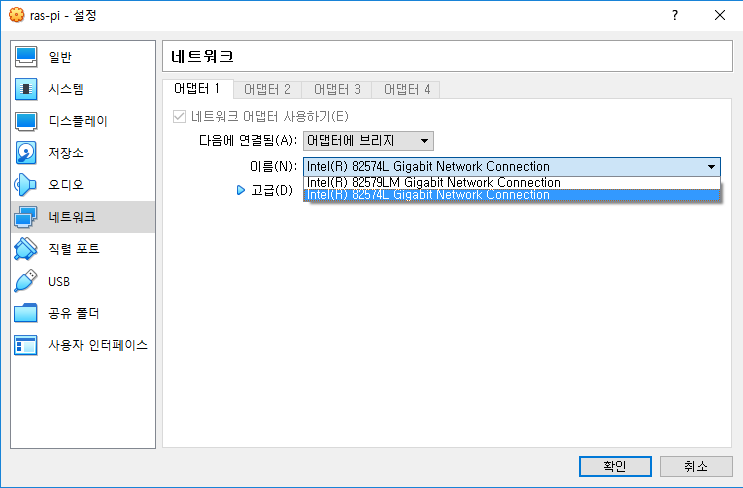<br>

------------------------------------
__가장 문제가 되는 부분__, 내부 망이 연결된 랜카드로 가상머신 네트워크 지정을 하면 다음과 같이 아예 자신의 IP를 인식하지 못하고, 내, 외부로 ping test도 나가지 않는다. 이 부분에서 막혀 대안을 찾는 중.<br>
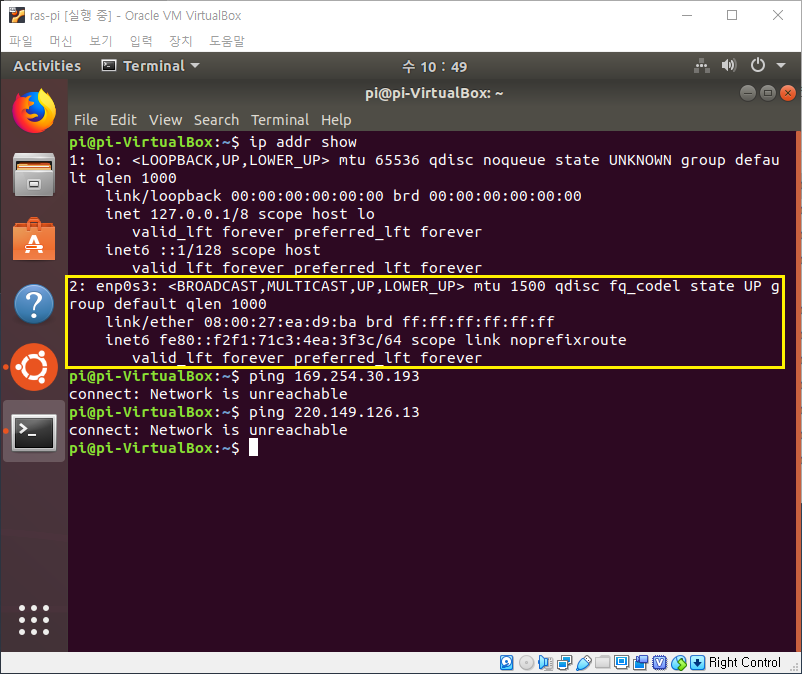<br>

# 정리 <br>
* WSL을 사용하든, VM / VB같은 가상머신을 사용하든 각기 다른 문제에 직면함. WSL에서는 파이에서 pc로 들어올 때 powershell이 아닌 바로 가상머신의 디렉토리로 접근할 수 있는 방법이 필요하고, 가상머신에서는 네트워크 설정하는 방법을 좀 더 공부해야 한다. <br>
<br>
* 다른 방안으로는 도커를 이용하는 방법 정도인데, 마찬가지로 hyper V를 구동하는 가상머신 개념이기 때문에 결과는 비슷할 것 같다. 마지막 방법으로 pc 운영체제 자체를 리눅스로 밀어버리는 방법을 생각하고 있다. 마지막 방법이 가장 확실한 방법이긴 할 것 같다.
